In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [2]:
data = pd.read_csv("D:\\Data Science\\Assignment\\Assignment 5\\50_Startups.csv")
data.head(11)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.rename(columns={'R&D Spend' : 'rd_Spend'}, inplace=True)
data.rename(columns={'Marketing Spend' : 'marketing_Spend'}, inplace=True)

In [5]:
data = data.drop(["State"] ,axis=1)
print(data)

     rd_Spend  Administration  marketing_Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        261776.23  129917.04
16   78013.11 

In [6]:
data.corr()

,rd_Spend,Administration,marketing_Spend,Profit
rd_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\heysr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


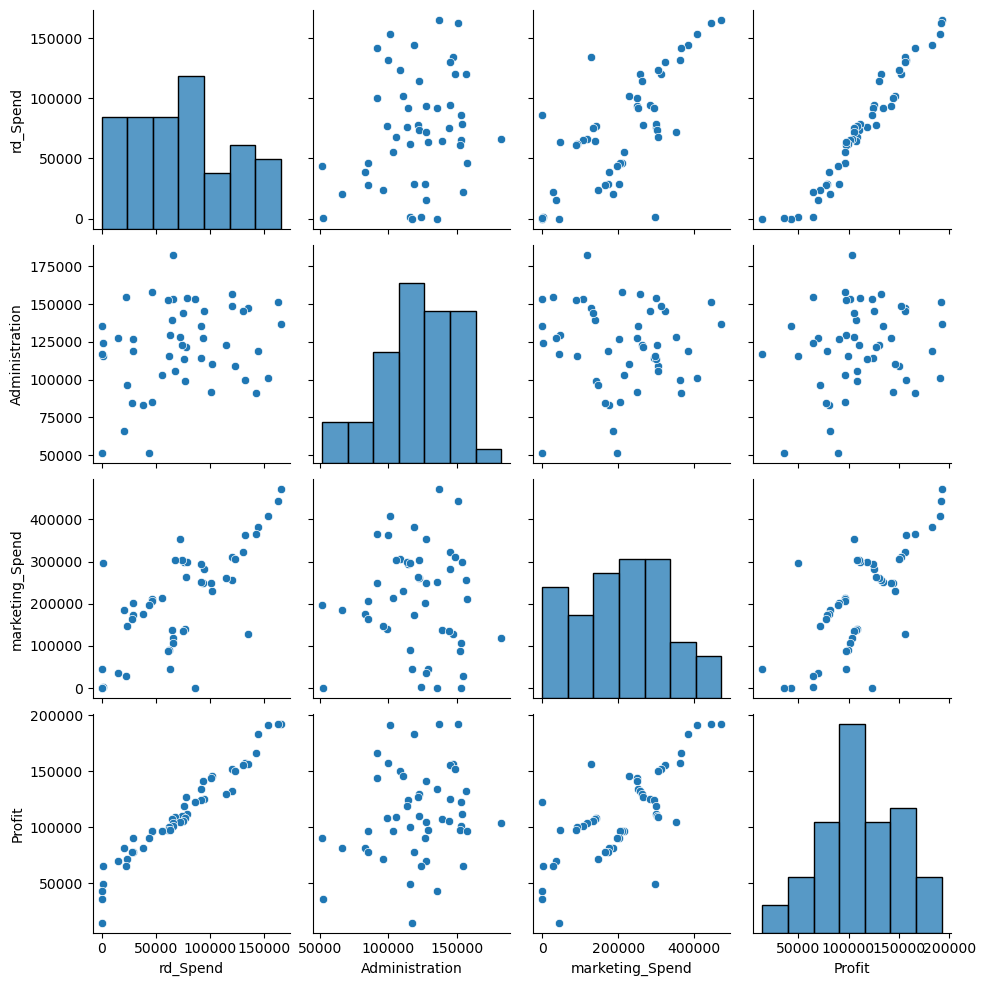

In [7]:
sns.pairplot(data)

In [8]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~rd_Spend+Administration+marketing_Spend', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        14:53:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model1 = smf.ols('Profit~rd_Spend', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           3.50e-32
Time:                        14:53:30   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model2 = smf.ols('Profit~Administration',data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 30 Nov 2023   Prob (F-statistic):              0.162
Time:                        14:53:30   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model3 = smf.ols('Profit~marketing_Spend',data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.38e-10
Time:                        14:53:30   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
rsq_rdspend = smf.ols('rd_Spend~Administration + marketing_Spend' ,data=data).fit().rsquared
vif_rdspend = 1/(1-rsq_rdspend)

rsq_adminstration = smf.ols('Administration~rd_Spend + marketing_Spend' ,data=data).fit().rsquared
vif_administration = 1/(1-rsq_adminstration)

rsq_marketing = smf.ols('marketing_Spend~Administration + rd_Spend' ,data=data).fit().rsquared
vif_marketing = 1/(1-rsq_marketing)

d1 = {' VARIABLE' : ['rd_Spend', 'Administration', 'marketing_Spend'], 'VIF': [vif_administration , vif_rdspend , vif_marketing]}
vif_frame = pd.DataFrame(d1)
vif_frame



,VARIABLE,VIF
0,rd_Spend,1.175091
1,Administration,2.468903
2,marketing_Spend,2.326773


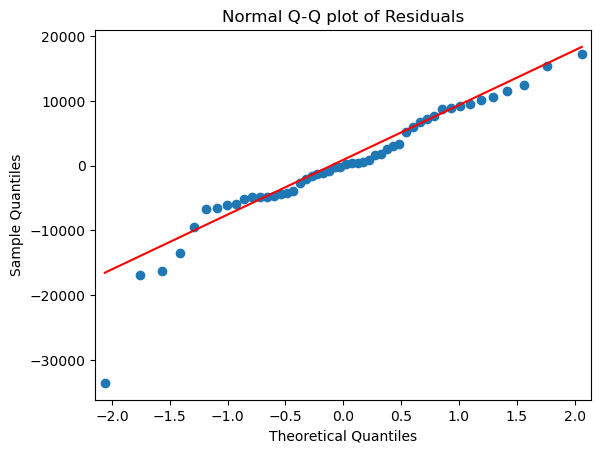

In [13]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [14]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

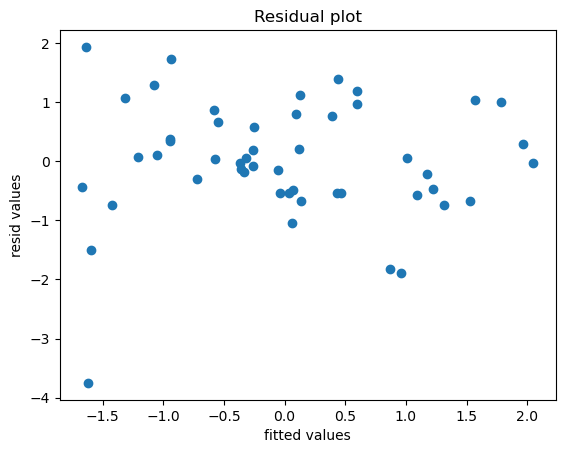

In [15]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual plot")
plt.xlabel("fitted values")
plt.ylabel("resid values")
plt.show()

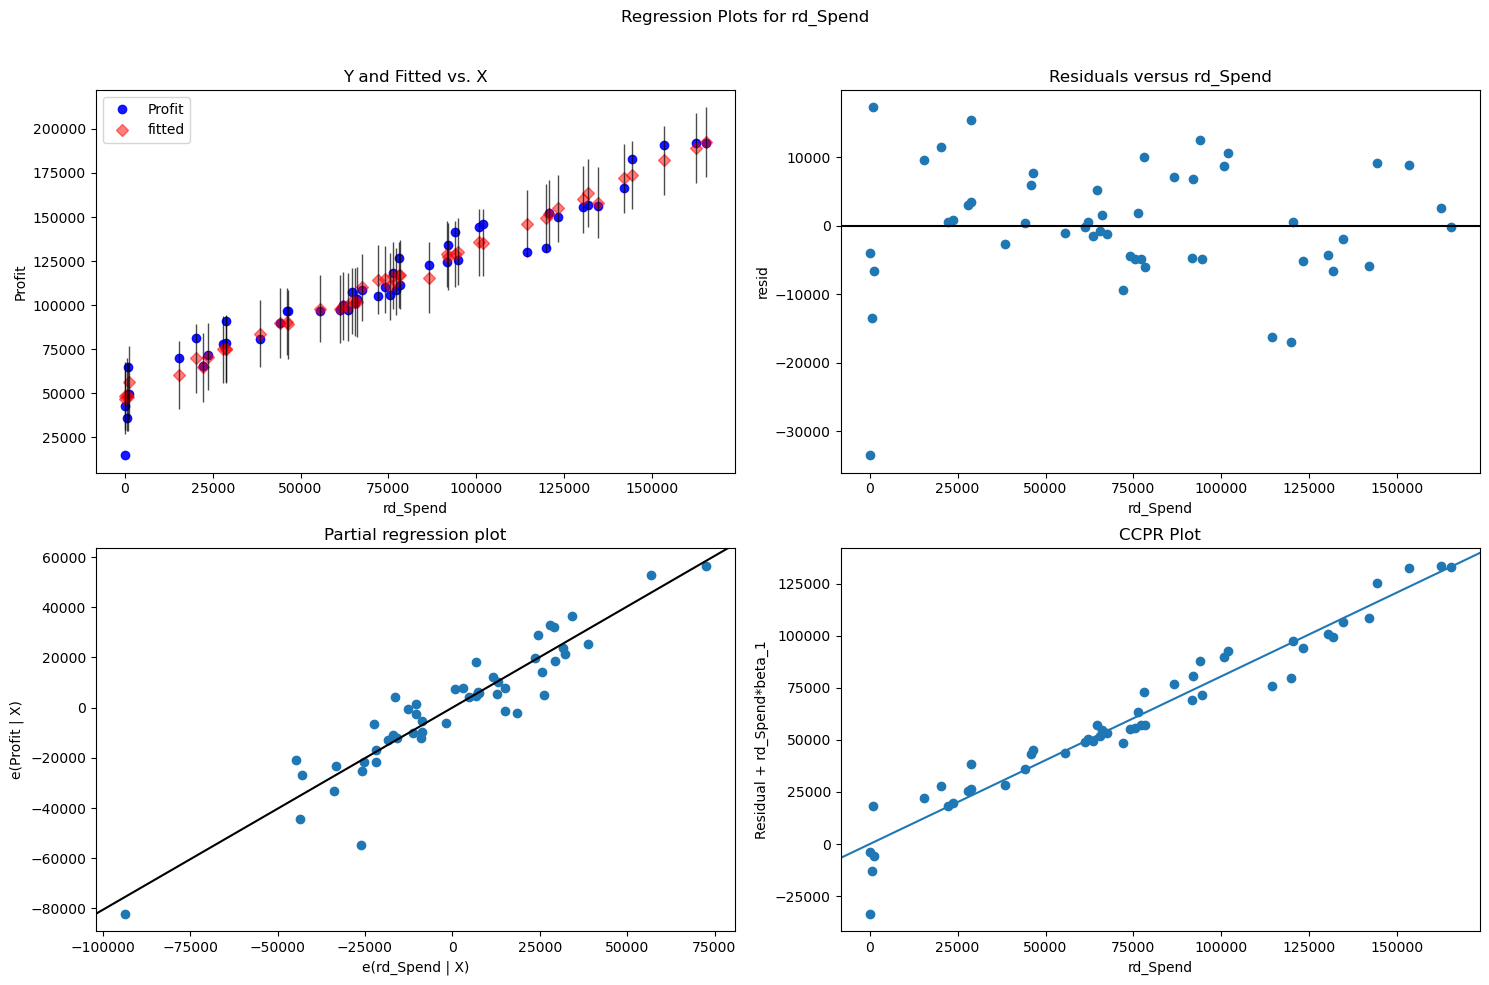

In [16]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'rd_Spend',fig=fig)
plt.show()

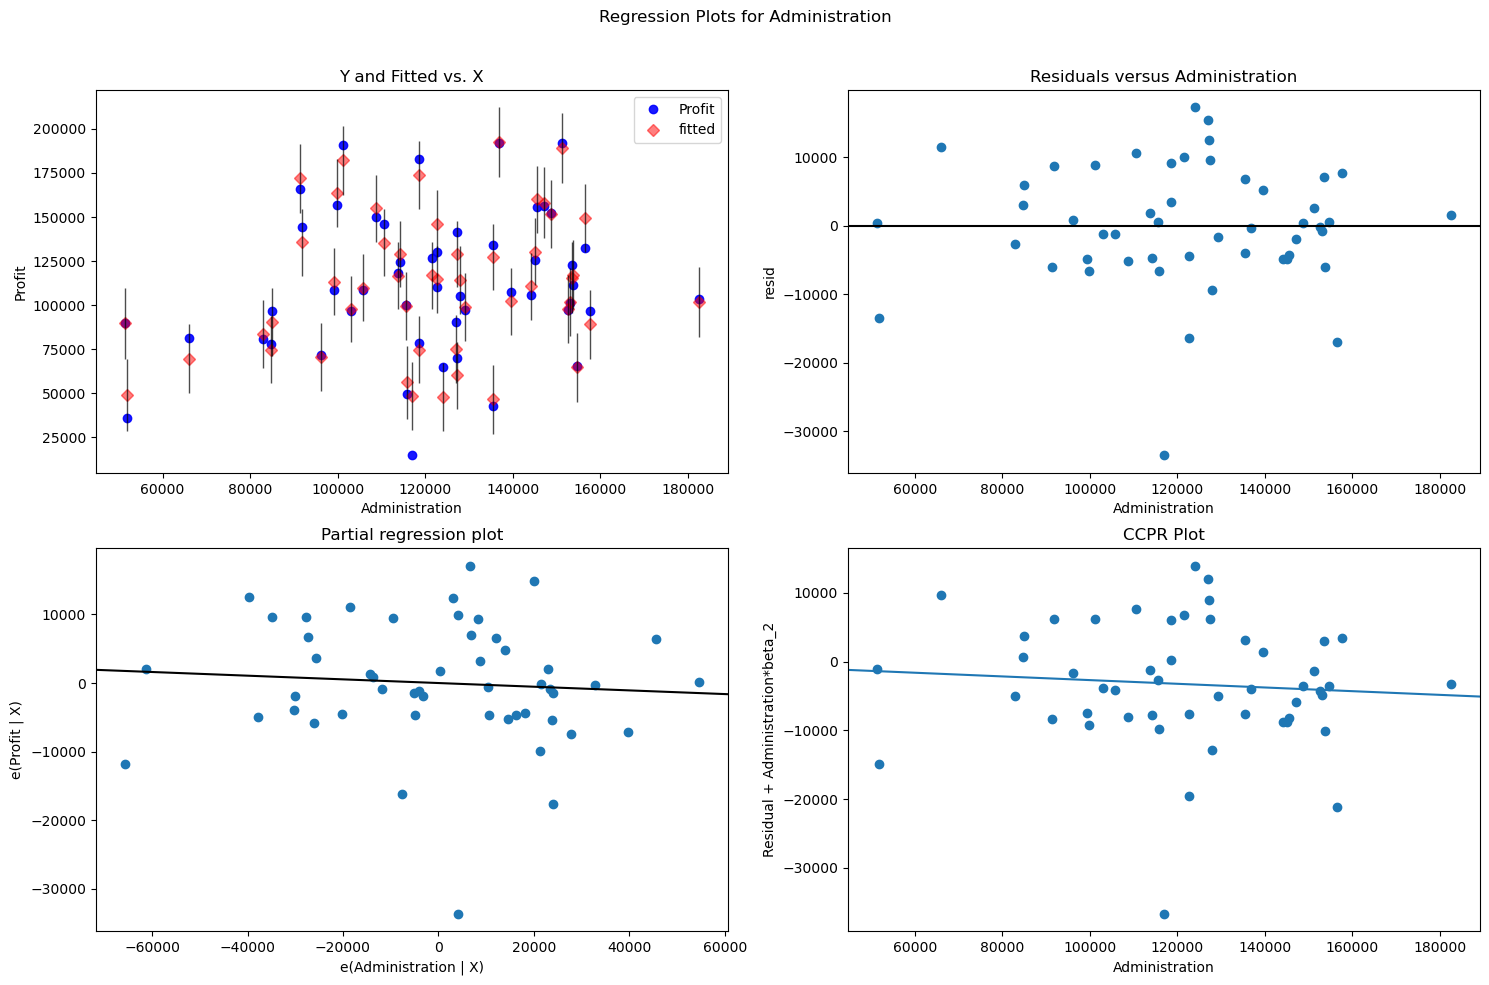

In [17]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

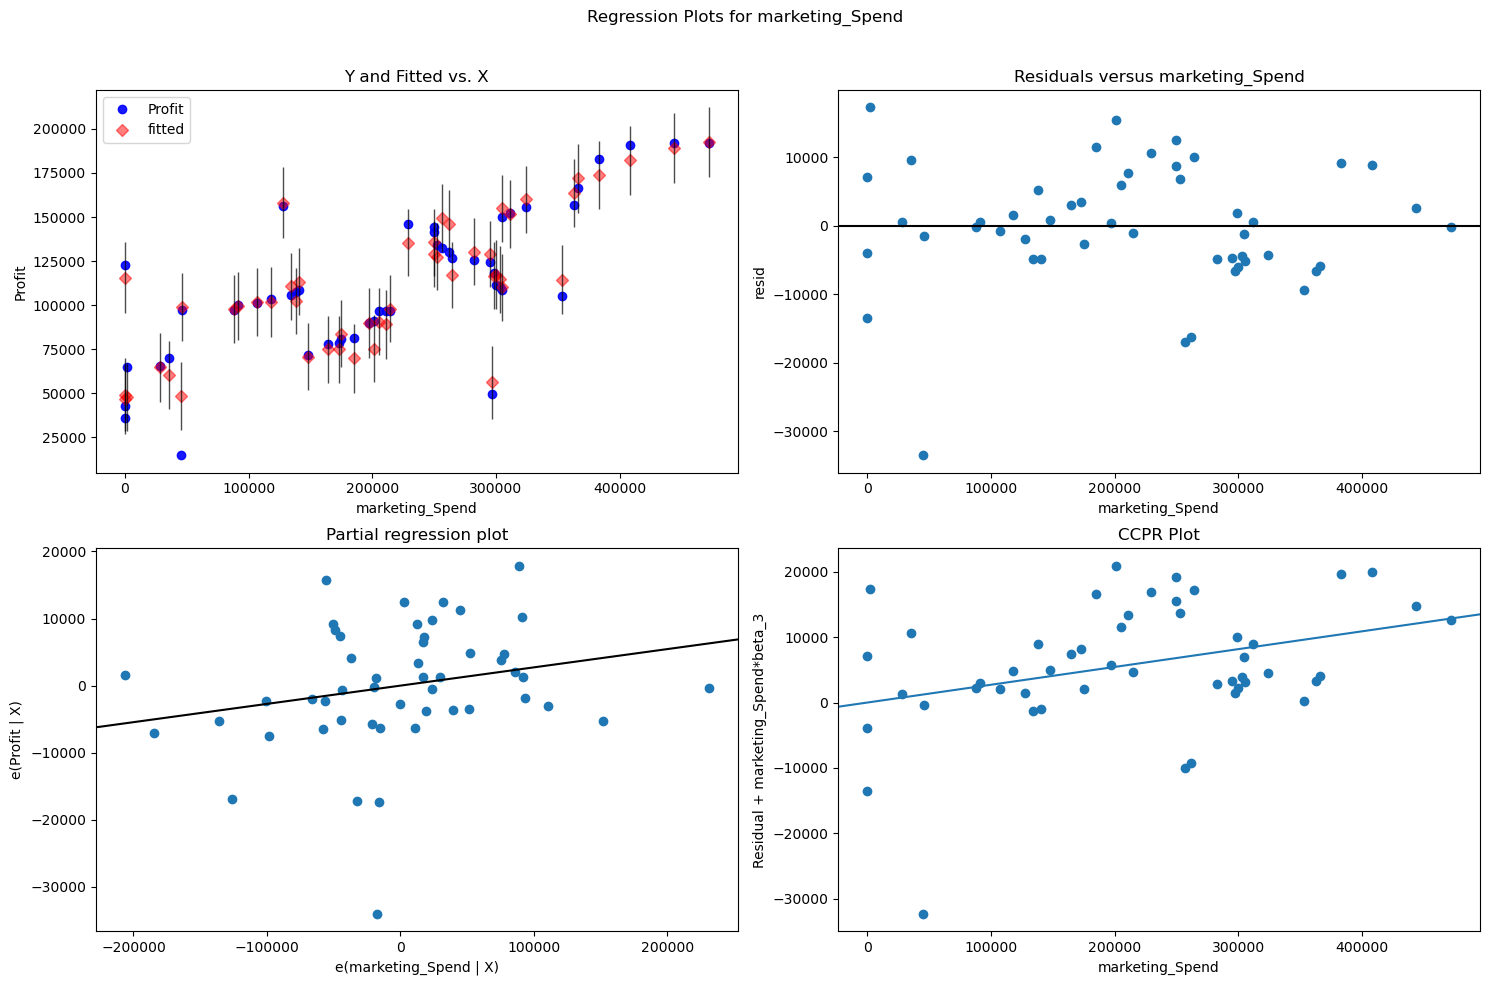

In [18]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'marketing_Spend',fig=fig)
plt.show()

In [19]:
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

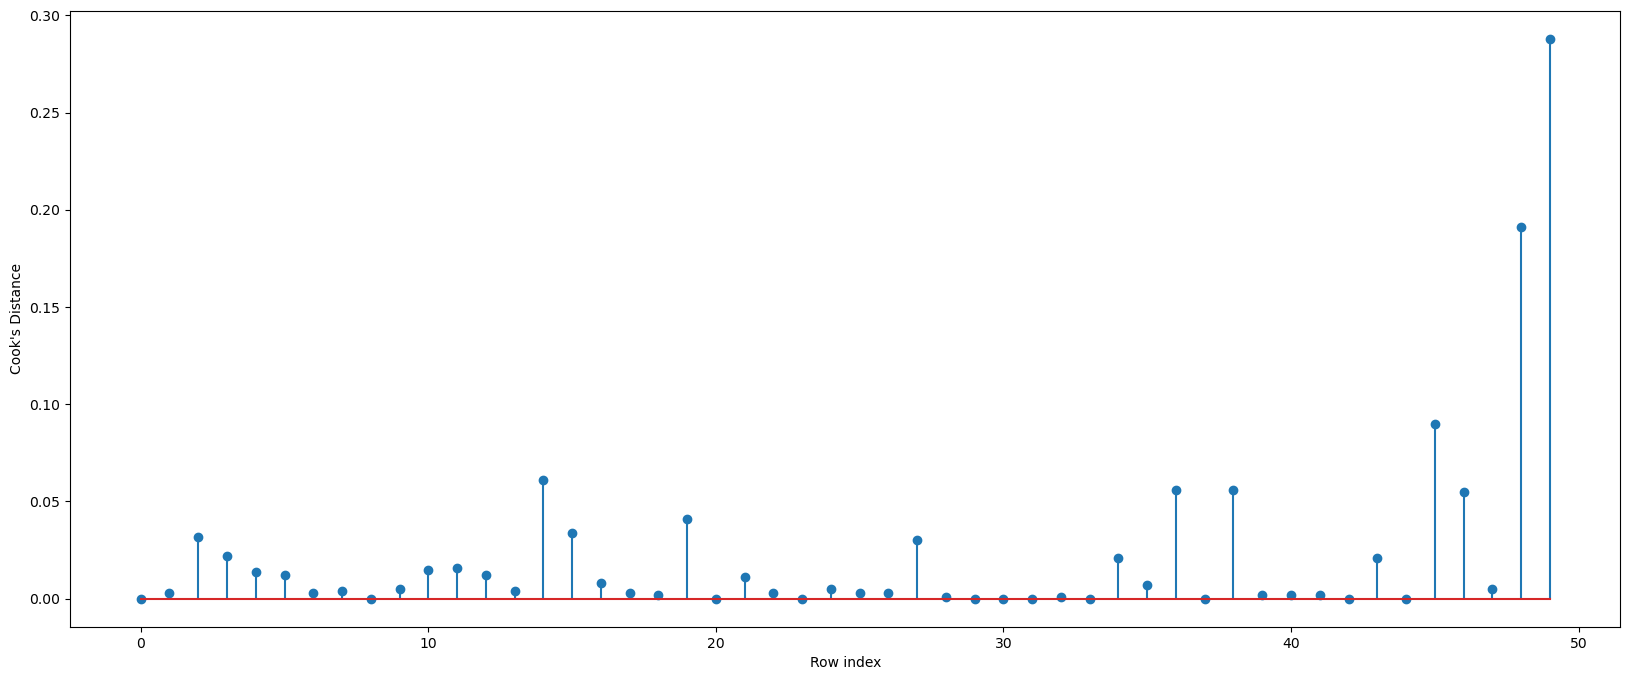

In [20]:
fig = plt.figure(figsize=(20,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cook's Distance")
plt.show()

In [21]:
k = data.shape[0]
n = data.shape[1]
leverage_cutoff = 3*((k+1)/n)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rd_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


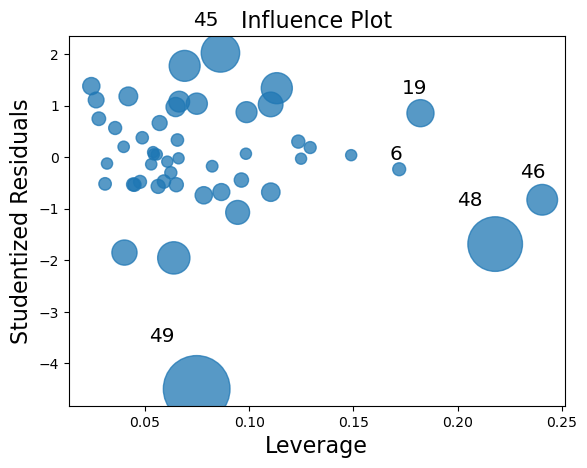

In [23]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rd_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [25]:
data_new = pd.read_csv("D:\\Data Science\\Assignment\\Assignment 5\\50_Startups.csv")
data_latest = data_new.drop(data_new.index[[48,49]],axis=0).reset_index()
data_latest.drop(['index'] , axis=1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [26]:
data_latest.drop(['State'], axis=1, inplace=True)

In [27]:
data_latest.rename(columns={'R&D Spend' : 'rd_Spend'}, inplace=True)
data_latest.rename(columns={'Marketing Spend' : 'marketing_Spend'}, inplace=True)

In [30]:
data_latest.head(5)

,index,rd_Spend,Administration,marketing_Spend,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94


In [31]:
final_model = smf.ols('Profit~rd_Spend+Administration+marketing_Spend', data=data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        14:54:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""